# Week 11 Tutorial
This notebook aims to describe the implementation of three basic deep learning models (i.e., multi-layer perceptron, convolutional neural network, and recurrent neural network). Based on the given toy examples, we can know how they work and which tasks they are good at.

## Handwritten digit database MNIST 

training set: 60 k

testing set: 10 K

The picture below shows how to represent the picture of the left in a matrix format, but the size of this matrix format is different from the MNIST dataset’s (28x28).

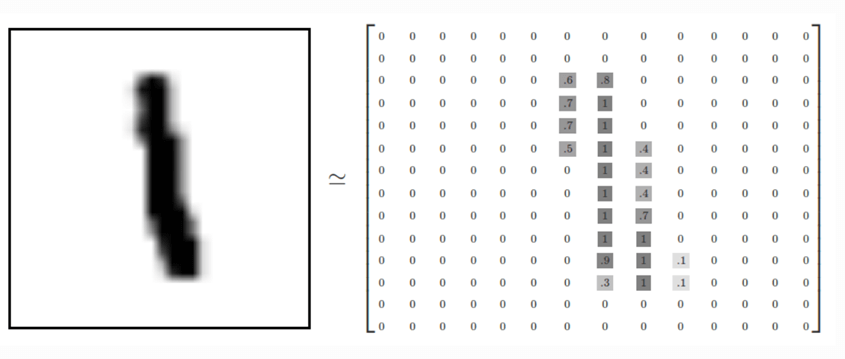


Here are some examples for MNIST samples:

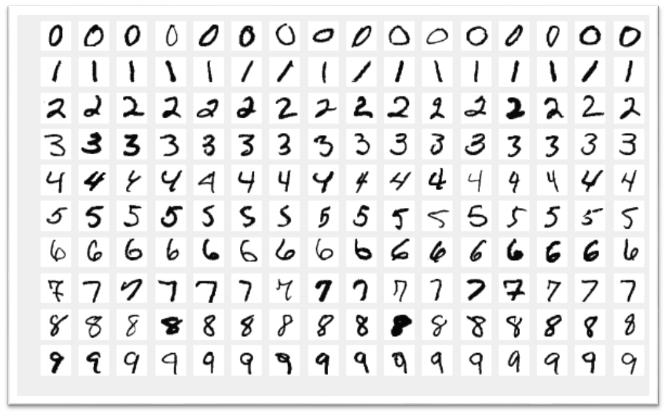

Let's take a look at the performance that some researchers have achieved on the MNIST database.

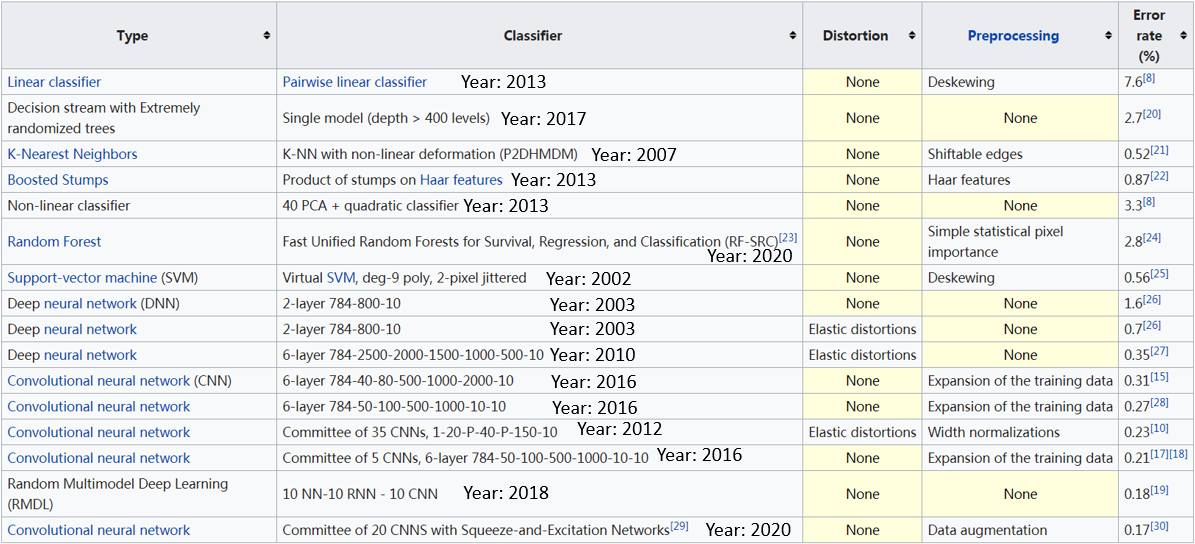

## Multi-layer perceptron (MLP)

### Overview

Although the Perceptron may seem like a good way to make classifications, it is a linear classifier (which, roughly, means it can only draw straight lines to divide spaces) and therefore it can be stumped by more complex problems. To solve this issue we can extend Perceptron by employing multiple layers of its functionality. The construct we are left with is called a Neural Network, or a Multi-Layer Perceptron, and it is a non-linear classifier. It achieves that by combining the results of linear functions on each layer of the network.

Similar to the Perceptron, this network also has an input and output layer; however, it can also have a number of hidden layers. These hidden layers are responsible for the non-linearity of the network. The layers are comprised of nodes. Each node in a layer (excluding the input one), holds some values, called weights, and takes as input the output values of the previous layer. The node then calculates the dot product of its inputs and its weights and then activates it with an activation function (e.g. sigmoid activation function). Its output is then fed to the nodes of the next layer. Note that sometimes the output layer does not use an activation function, or uses a different one from the rest of the network. The process of passing the outputs down the layer is called feed-forward.

After the input values are fed-forward into the network, the resulting output can be used for classification. The problem at hand now is how to train the network (i.e. adjust the weights in the nodes). To accomplish that we utilize the Backpropagation algorithm. In short, it does the opposite of what we were doing up to this point. Instead of feeding the input forward, it will track the error backwards. So, after we make a classification, we check whether it is correct or not, and how far off we were. We then take this error and propagate it backwards in the network, adjusting the weights of the nodes accordingly. We will run the algorithm on the given input/dataset for a fixed amount of time, or until we are satisfied with the results. The number of times we will iterate over the dataset is called epochs. In a later section we take a detailed look at how this algorithm works.

NOTE: Sometimes we add another node to the input of each layer, called bias. This is a constant value that will be fed to the next layer, usually set to 1. The bias generally helps us "shift" the computed function to the left or right.

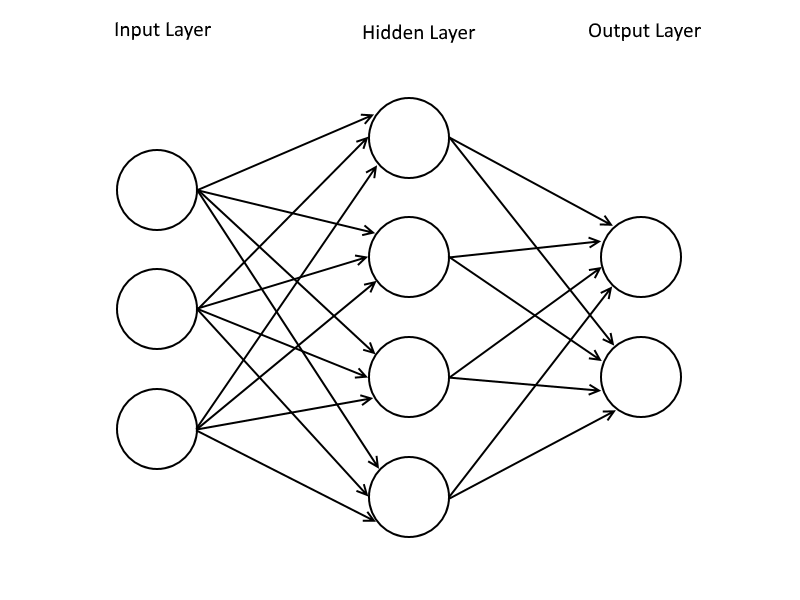

### Implementation


In [2]:
# Create the model
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist.train
sess = tf.InteractiveSession()

#initialization
in_units = mnist.train.images.shape[1] #784: 28*28
h1_units = 300
out_units = 10 # 0,1,2,3,4,5,6,7,8,9

epoch = 3000
batch_size = 100

W1 = tf.Variable(tf.truncated_normal([in_units, h1_units], stddev=0.1))
b1 = tf.Variable(tf.zeros([h1_units]))
W2 = tf.Variable(tf.zeros([h1_units, out_units]))
b2 = tf.Variable(tf.zeros([out_units]))

x = tf.placeholder(tf.float32, [None, in_units])
keep_prob = tf.placeholder(tf.float32) 
#Keep_prob controls the regularization rate to randomly drop out the given elements 
#in those neurons in the fully connected layer during training

hidden1 = tf.nn.relu(tf.matmul(x, W1) + b1)  #relu(w1 * x + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_drop, W2) + b2)

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(0.3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Train
tf.global_variables_initializer().run()
for i in range(epoch):
  batch_xs, batch_ys = mnist.train.next_batch(batch_size)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y_: batch_ys, keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run({x: batch_xs, y_: batch_ys, keep_prob: 0.75})
  
# Test trained model
print("testing accuracy %g"%accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.12
step 100, training accuracy 0.91
step 200, training accuracy 0.93
step 300, training accuracy 0.91
step 400, training accuracy 0.96
step 500, training accuracy 0.95
step 600, training accuracy 0.99
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 0.97
step 1000, training accuracy 0.98
step 1100, training accuracy 0.99
step 1200, training accuracy 0.99
step 1300, training accuracy 0.98
step 1400, training accuracy 0.96
step 1500, training accuracy 0.99
step 1600, training accuracy 0.99
step 1700, training accuracy 1
step 1800, training accuracy 0.99
step 1900, training accuracy 1
step 2000, training accuracy 1
step 2100, training accuracy 0.98
step 2200, training accuracy 0.95
step 2300, training accuracy 0.98
step 2400, 

## Convolutional neural network (CNN)

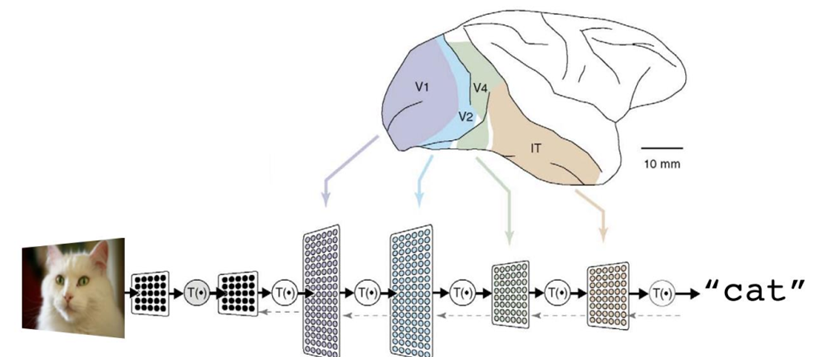

### Overview

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. Convolutional Neural Networks learn a complex representation of visual data using vast amounts of data. They are inspired by the human visual system and learn multiple layers of transformations, which are applied to top of each other to extract a progressively more sophisticated representation of the input. 

### How CNN work

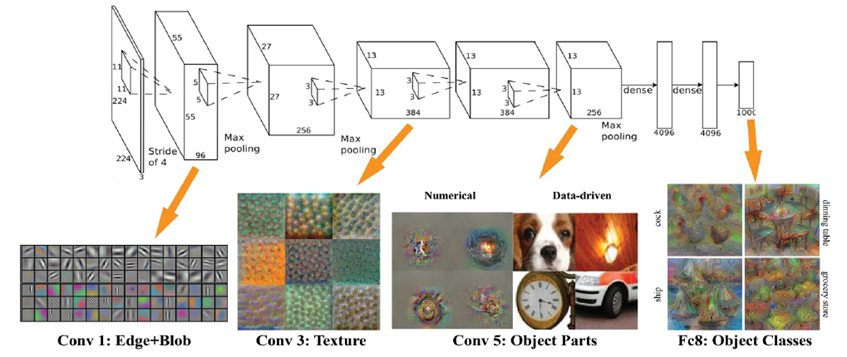

**Convolution layer**: a feature detector that automagically learns to filter out not needed information from an input by using convolution kernel. Each layer applies a convolution operation to the input, passing the result to the next layer. The convolution emulates the response of an individual neuron to visual stimuli. Each convolutional neuron processes data only for its receptive field.

**Pooling layers**: reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Local pooling combines small clusters. Pooling may compute a *max* or an *average*. Max pooling uses the maximum value from each of a cluster of neurons at the prior layer. Average pooling uses the average value from each of a cluster of neurons at the prior layer.

### Implementation

In [3]:
#Outputs random values from a truncated normal distribution
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

#Embeds constant values in the graph
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

#Constructs a two-dimensional convolutional layer with the number of filters, 
#filter kernel size, padding and activation function as arguments
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

#Constructs a two-dimensional pooling layer using the max-pooling algorithm
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  

#Initialize the input and output layers
x = tf.placeholder(tf.float32, [None, in_units])
y_ = tf.placeholder(tf.float32, [None, out_units])
x_image = tf.reshape(x, [-1,28,28,1])

#Specify convolutional layers, pooling layers and fully connected layer 
W_conv1 = weight_variable([5, 5, 1, 32]) # Apply 32 5*5 filters to one channel
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64]) # Apply 64 5*5 filters to 32 channel
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

'''After two times of max-pooling layers of 2x2 filters, the output feature maps were 
normalized to fit in a 7x7 (49) pixel box and then their dimensionalities were reduced 
by 1024 neurons of the fully connected layer
'''
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Define the output layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.global_variables_initializer().run()
for i in range(epoch):
  batch = mnist.train.next_batch(batch_size)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 100, training accuracy 0.89
step 200, training accuracy 0.9
step 300, training accuracy 0.93
step 400, training accuracy 0.94
step 500, training accuracy 0.96
step 600, training accuracy 0.98
step 700, training accuracy 0.97
step 800, training accuracy 0.92
step 900, training accuracy 0.95
step 1000, training accuracy 0.96
step 1100, training accuracy 0.93
step 1200, training accuracy 0.95
step 1300, training accuracy 0.96
step 1400, training accuracy 0.98
step 1500, training accuracy 0.96
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 0.96
step 1900, training accuracy 0.99
step 2000, training accuracy 0.98
step 2100, training accuracy 0.98
step 2200, training accuracy 0.95
step 2300, training accuracy 0.99
step 2400, training accuracy 0.99
step 2500, training accuracy 0.99
step 2600, training accuracy 0.99
step 2700, training accuracy 0.97
step 2800, training accuracy 0.99
step 2900, training accuracy 0.

## Recurrent neural network (RNN)

### Overview

RNN: A class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs.

- Feedforward neural networks (e.g. MLPs and CNNs) are powerful, but they are not optimized to handle "sequential" data
- In other words, they do not possess "memory" of previous inputs
- For instance, consider the case of translating a corpus. You need to consider the **"context"** to guess the next word to come forward

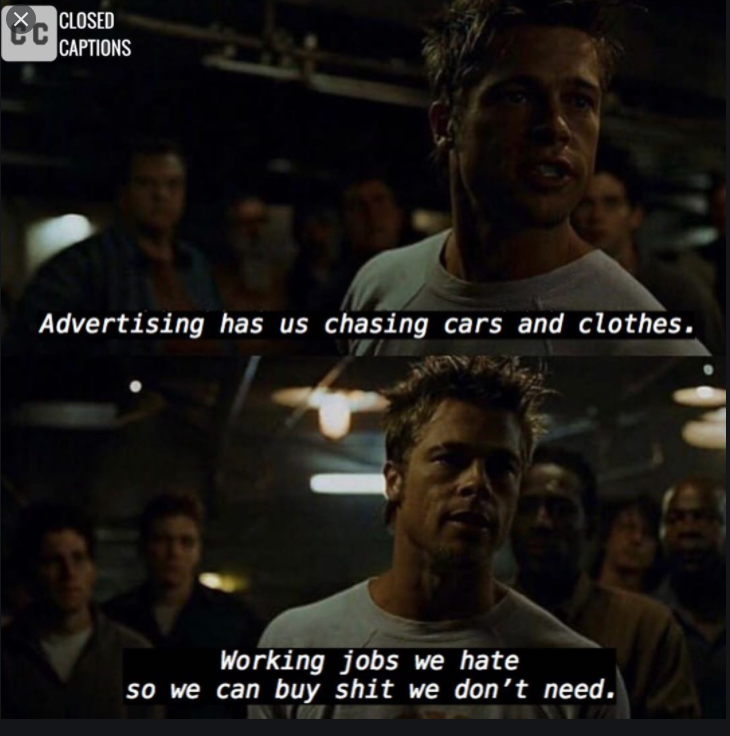


- RNNs are suitable for dealing with sequential format data since they have **"recurrent"** structure
- To put it differently, they keep the **"memory"** of earlier inputs in the sequence

<img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" style="width: 600px"/>

<br>
- However, in order to reduce the number of parameters, every layer of different time steps shares same parameters
</br>

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" style="width: 600px"/>

### Implementation (Keras)


In [4]:
import numpy as np

from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

#Tring set: 1395
#Tesing set: 599
unit_num = 100

# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))


y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data) #one-hot encoding

y_train = y_data[:1395]
y_test = y_data[1395:]

def naive_rnn():
    model = Sequential() # sequential class is a linear stack of layers in Keras
    model.add(SimpleRNN(unit_num, input_shape = (X_train.shape[1],1), return_sequences = False))
    model.add(Dense(y_data.shape[1])) # output units
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model


model = KerasClassifier(build_fn = naive_rnn, epochs = 200, batch_size = 50, verbose = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)
print(accuracy_score(y_pred, y_test_))

Epoch 1/200
1395/1395 [==============================] - 1s 460us/sample - loss: 2.1993 - acc: 0.5505
Epoch 2/200
1395/1395 [==============================] - 1s 410us/sample - loss: 1.1948 - acc: 0.7133
Epoch 3/200
1395/1395 [==============================] - 1s 408us/sample - loss: 1.1632 - acc: 0.7147
Epoch 4/200
1395/1395 [==============================] - 1s 412us/sample - loss: 1.1537 - acc: 0.7147
Epoch 5/200
1395/1395 [==============================] - 1s 407us/sample - loss: 1.1531 - acc: 0.7147
Epoch 6/200
1395/1395 [==============================] - 1s 409us/sample - loss: 1.1549 - acc: 0.7147
Epoch 7/200
1395/1395 [==============================] - 1s 404us/sample - loss: 1.1508 - acc: 0.7147
Epoch 8/200
1395/1395 [==============================] - 1s 409us/sample - loss: 1.1453 - acc: 0.7147
Epoch 9/200
1395/1395 [==============================] - 1s 408us/sample - loss: 1.1438 - acc: 0.7147
Epoch 10/200
1395/1395 [==============================] - 1s 413us/sample - loss: 

## References

- https://github.com/aimacode/aima-python
- https://github.com/buomsoo-kim/Easy-deep-learning-with-Keras